In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Reading the data
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data read successfully")

Data read successfully


In [3]:
# See the first 5 rows of the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

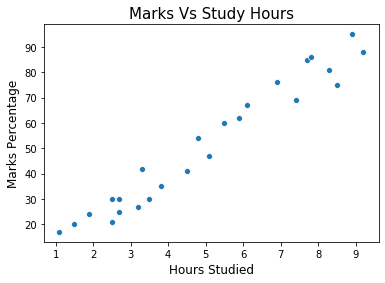

In [5]:
# Plotting the distribution of scores
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=15)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

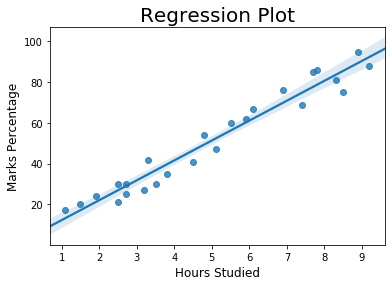

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [6]:
# Plotting the regression line
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# Correlation
print(data.corr())

In [8]:
# X -> attributes || y -> labels

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [10]:
# Splitting the data (Training & Test datasets)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  
lr.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [12]:
y_pred = lr.predict(X_test) # Predicting the scores
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [14]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in y_pred]})
df

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [15]:
# Comparing the Actual marks and the Predicted Marks
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


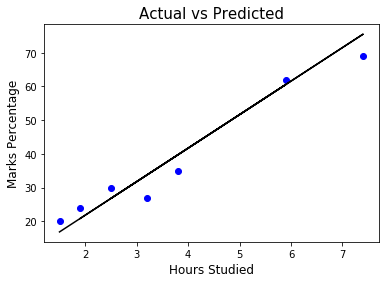

In [16]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=15)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [17]:
from sklearn import metrics as m

print('Mean Absolute Error:', 
      m.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.130879918502486


In [18]:
hours = [9.25]
answer = lr.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


# ------------------------------------The End---------------------------------------------------------------------